# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 74.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


### Import Statements

In [98]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [7]:
df_data.shape

(4324, 9)

4329 rows, and 9 columns

In [8]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [10]:
df_data.isna().any()

Unnamed: 0.1      False
Unnamed: 0        False
Organisation      False
Location          False
Date              False
Detail            False
Rocket_Status     False
Price              True
Mission_Status    False
dtype: bool

In [11]:
df_data.duplicated().any()

False

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [12]:
cleaned_df = df_data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

In [13]:
cleaned_df['Price'].fillna(value=0, inplace=True)

In [15]:
missing_values_after_cleaning = cleaned_df.isna().any()

In [16]:
cleaned_df.drop_duplicates(inplace=True)

In [17]:
duplicates_after_cleaning = cleaned_df.duplicated().any()

In [18]:
cleaned_df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Descriptive Statistics

In [19]:
cleaned_df.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4323,4323,4323,4323,4323,4323,4323
unique,56,137,4319,4278,2,57,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Sun Aug 25, 1991 08:40 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,0,Success
freq,1777,235,2,6,3534,3360,3878


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [24]:
launch_counts = cleaned_df['Organisation'].value_counts()

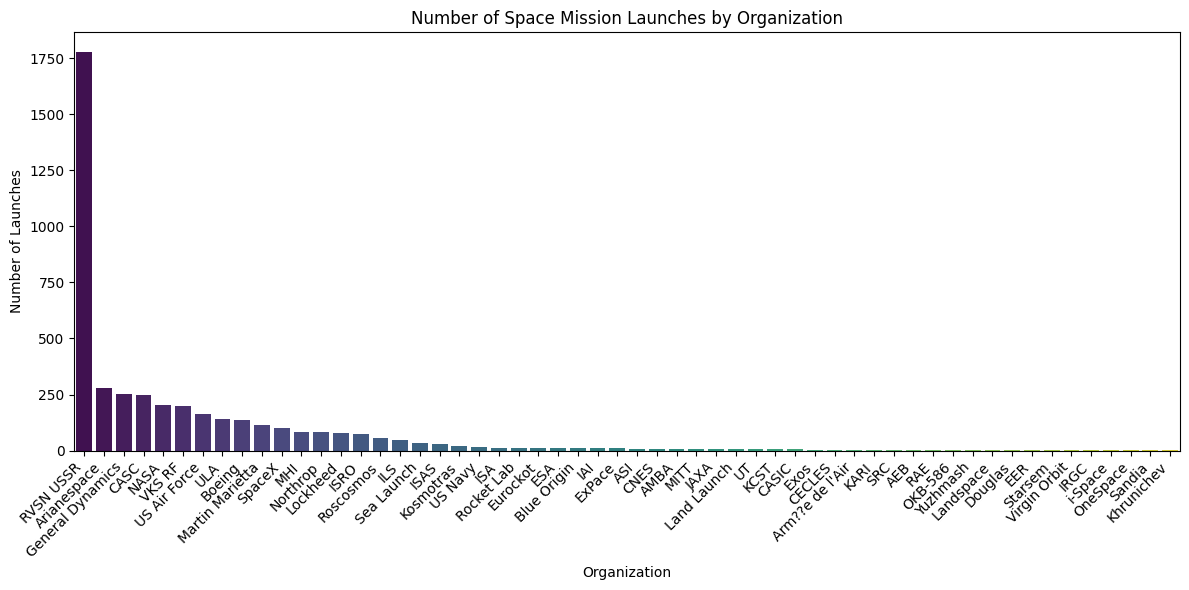

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(x=launch_counts.index, y=launch_counts.values, palette='viridis')
plt.title('Number of Space Mission Launches by Organization')
plt.xlabel('Organization')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [26]:
rocket_status_counts = cleaned_df['Rocket_Status'].value_counts()

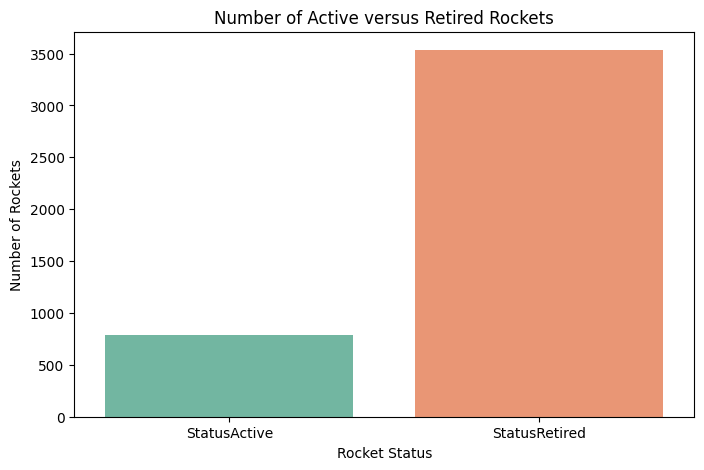

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Rocket_Status', data=cleaned_df, palette='Set2')
plt.title('Number of Active versus Retired Rockets')
plt.xlabel('Rocket Status')
plt.ylabel('Number of Rockets')
plt.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [28]:
mission_status_counts = cleaned_df['Mission_Status'].value_counts()

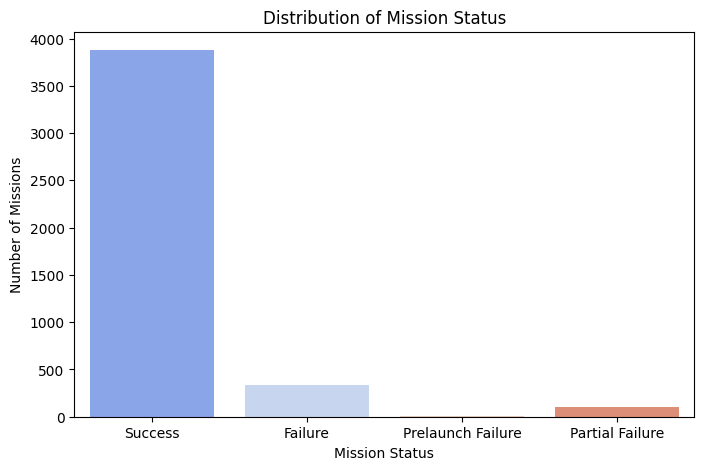

In [29]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Mission_Status', data=cleaned_df, palette='coolwarm')
plt.title('Distribution of Mission Status')
plt.xlabel('Mission Status')
plt.ylabel('Number of Missions')
plt.show()

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [45]:
non_zero_prices = cleaned_df[cleaned_df['Price'] != 0]

In [46]:
non_zero_prices['Price'] = non_zero_prices['Price'].astype(str)

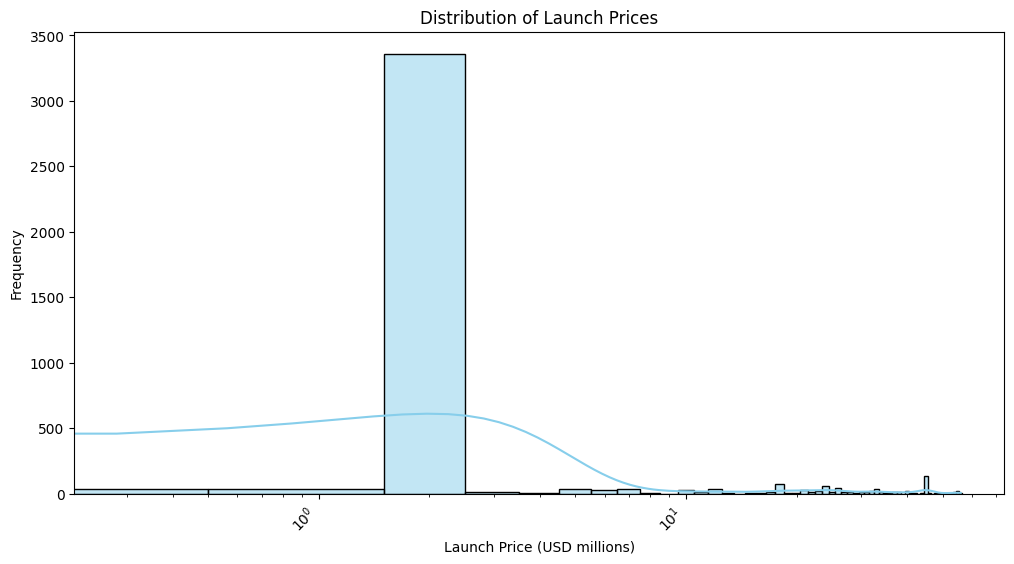

In [47]:
plt.figure(figsize=(12, 6))
sns.histplot(non_zero_prices['Price'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Launch Prices')
plt.xlabel('Launch Price (USD millions)')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.xscale('log')  # Use logarithmic scale for the x-axis
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [87]:
cleaned_df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA


In [99]:
country_name_corrections = {
    'Russia': 'RUS',
    'New Mexico': 'USA',
    'Yellow Sea': 'CHN',
    'Shahrud Missile Test Site': 'IRN',
    'Pacific Missile Range Facility': 'USA',
    'Barents Sea': 'RUS',
    'Gran Canaria': 'USA'
}

In [100]:
cleaned_df['Country'] = cleaned_df['Location'].apply(lambda loc: next((v for k, v in country_name_corrections.items() if k in loc), None))


In [101]:
cleaned_df = cleaned_df.dropna(subset=['Country'])

In [105]:
launch_counts_by_country = cleaned_df['Country'].value_counts().reset_index()
launch_counts_by_country.columns = ['Country', 'Number of Launches']

In [106]:
fig = px.choropleth(
    launch_counts_by_country,
    locations="Country",
    color="Number of Launches",
    title="Number of Launches by Country",
    color_continuous_scale="Viridis",  # Use a continuous color scale
    projection="natural earth",
    labels={'Number of Launches': 'Number of Launches'}
)

fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [107]:
failed_launches_by_country = cleaned_df[cleaned_df['Mission_Status'] == 'Failure']['Country'].value_counts().reset_index()
failed_launches_by_country.columns = ['Country', 'Number of Failures']

In [108]:
fig = px.choropleth(
    failed_launches_by_country,
    locations="Country",
    color="Number of Failures",
    title="Number of Failures by Country",
    color_continuous_scale="Viridis",  # Use a continuous color scale
    projection="natural earth",
    labels={'Number of Failures': 'Number of Failures'}
)

fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [109]:
sunburst_data = cleaned_df[['Country', 'Organisation', 'Mission_Status']]


In [110]:
fig = px.sunburst(
    sunburst_data,
    path=['Country', 'Organisation', 'Mission_Status'],
    title="Sunburst Chart of Countries, Organisations, and Mission Status",
    height=700
)

fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [111]:
total_money_by_organization = cleaned_df.groupby('Organisation')['Price'].sum().reset_index()

In [112]:
fig = px.bar(
    total_money_by_organization,
    x='Organisation',
    y='Price',
    title='Total Amount of Money Spent by Organisation on Space Missions',
    labels={'Price': 'Total Amount Spent (USD)'},
    color='Price',  # You can remove this line if you don't want to color by price
)

fig.update_layout(xaxis_title='Organisation', yaxis_title='Total Amount Spent (USD)')

fig.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [114]:
cleaned_df['Price'] = pd.to_numeric(cleaned_df['Price'], errors='coerce')

In [115]:
cleaned_df['Cost_Per_Launch'] = cleaned_df['Price'] / cleaned_df.groupby('Organisation')['Price'].transform('count')

In [116]:
fig = px.bar(
    cleaned_df,
    x='Organisation',
    y='Cost_Per_Launch',
    title='Amount of Money Spent by Organisation per Launch',
    labels={'Cost_Per_Launch': 'Cost per Launch (USD)'},
    color='Cost_Per_Launch',  # You can remove this line if you don't want to color by cost per launch
)

fig.update_layout(xaxis_title='Organisation', yaxis_title='Cost per Launch (USD)')

fig.show()

# Chart the Number of Launches per Year

In [133]:
cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'], errors='coerce', utc=True)


In [134]:
cleaned_df['Year'] = cleaned_df['Date'].dt.year

In [135]:
launches_per_year = cleaned_df['Year'].value_counts().reset_index()
launches_per_year.columns = ['Year', 'Number of Launches']

In [136]:
fig = px.bar(
    launches_per_year,
    x='Year',
    y='Number of Launches',
    title='Number of Launches per Year',
    labels={'Number of Launches': 'Number of Launches'},
)

fig.update_layout(xaxis_title='Year', yaxis_title='Number of Launches')

fig.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [137]:
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')

<ipython-input-137-1abd6b02b1bb>:1: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [138]:
launches_per_month = cleaned_df['Month'].value_counts().sort_index().reset_index()
launches_per_month.columns = ['Month', 'Number of Launches']

In [142]:
launches_per_month['Month'] = launches_per_month['Month'].astype(str)

In [143]:
launches_per_month['Rolling Average'] = launches_per_month['Number of Launches'].rolling(window=12, min_periods=1).mean()


In [144]:
max_launch_month = launches_per_month.loc[launches_per_month['Number of Launches'].idxmax()]['Month']

In [145]:
fig = px.line(
    launches_per_month,
    x='Month',
    y=['Number of Launches', 'Rolling Average'],
    title='Number of Launches Month-on-Month with Rolling Average',
    labels={'Number of Launches': 'Number of Launches', 'Rolling Average': 'Rolling Average'},
)

fig.add_annotation(
    text=f'Highest launches: {max_launch_month}',
    xref='paper', yref='paper',
    x=0.5, y=1.05,
    showarrow=False,
)

fig.update_layout(xaxis_title='Month', yaxis_title='Number of Launches')

fig.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [149]:
launches_per_month['Month'] = pd.Categorical(launches_per_month['Month'],
                                             categories=['January', 'February', 'March', 'April', 'May', 'June',
                                                         'July', 'August', 'September', 'October', 'November', 'December'],
                                             ordered=True)
launches_per_month = launches_per_month.sort_values('Month')

In [150]:
fig = px.bar(
    launches_per_month,
    x='Month',
    y='Number of Launches',
    title='Number of Launches per Month',
    labels={'Number of Launches': 'Number of Launches'},
)

fig.update_layout(xaxis_title='Month', yaxis_title='Number of Launches')

fig.show()

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [151]:
cleaned_df['Price'] = pd.to_numeric(cleaned_df['Price'], errors='coerce')

In [152]:
average_price_by_year = cleaned_df.groupby('Year')['Price'].mean().reset_index()


In [153]:
fig = px.line(
    average_price_by_year,
    x='Year',
    y='Price',
    title='Average Price of Rocket Launches Over Time',
    labels={'Price': 'Average Launch Price'},
)

fig.update_layout(xaxis_title='Year', yaxis_title='Average Launch Price')

fig.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [154]:
top_10_organizations = cleaned_df['Organisation'].value_counts().nlargest(10).index

In [155]:
filtered_df = cleaned_df[cleaned_df['Organisation'].isin(top_10_organizations)]

In [156]:
launches_by_organization = filtered_df.groupby(['Year', 'Organisation']).size().reset_index(name='Number of Launches')

In [157]:
fig = px.line(
    launches_by_organization,
    x='Year',
    y='Number of Launches',
    color='Organisation',
    title='Number of Launches Over Time by the Top 10 Organizations',
    labels={'Number of Launches': 'Number of Launches'},
)

fig.update_layout(xaxis_title='Year', yaxis_title='Number of Launches')

fig.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [158]:
cold_war_df = cleaned_df[cleaned_df['Year'] <= 1991]


In [159]:
usa_ussr_df = cold_war_df[cold_war_df['Organisation'].isin(['USA', 'USSR'])]

In [160]:
launches_by_country = usa_ussr_df.groupby(['Year', 'Organisation']).size().reset_index(name='Number of Launches')


In [161]:
fig = px.line(
    launches_by_country,
    x='Year',
    y='Number of Launches',
    color='Organisation',
    title='Cold War Space Race: Number of Launches by USA and USSR',
    labels={'Number of Launches': 'Number of Launches'},
)

fig.update_layout(xaxis_title='Year', yaxis_title='Number of Launches')

fig.show()

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [162]:
usa_ussr_df = cleaned_df[cleaned_df['Organisation'].isin(['USA', 'USSR', 'Kazakhstan'])]


In [163]:
total_launches_by_country = usa_ussr_df['Organisation'].value_counts().reset_index(name='Total Launches')


In [164]:
fig = px.pie(
    total_launches_by_country,
    names='index',
    values='Total Launches',
    title='Total Number of Launches by USA, USSR, and Kazakhstan',
)

fig.update_layout(showlegend=False)

fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [165]:
usa_ussr_df = cleaned_df[cleaned_df['Organisation'].isin(['USA', 'USSR'])]

In [166]:
total_launches_by_year = usa_ussr_df.groupby(['Year', 'Organisation']).size().reset_index(name='Number of Launches')

In [167]:
fig = px.bar(
    total_launches_by_year,
    x='Year',
    y='Number of Launches',
    color='Organisation',
    title='Total Number of Launches Year-On-Year by USA and USSR',
    labels={'Number of Launches': 'Number of Launches'},
)

fig.update_layout(xaxis_title='Year', yaxis_title='Number of Launches')

fig.show()

## Chart the Total Number of Mission Failures Year on Year.

In [168]:
# Filter the DataFrame for failed missions
failed_missions_df = cleaned_df[cleaned_df['Mission_Status'] == 'Failure']

# Group by year to get the total number of mission failures
total_failures_by_year = failed_missions_df.groupby('Year').size().reset_index(name='Number of Failures')


In [169]:
fig = px.bar(
    total_failures_by_year,
    x='Year',
    y='Number of Failures',
    title='Total Number of Mission Failures Year-On-Year',
    labels={'Number of Failures': 'Number of Failures'},
)

fig.update_layout(xaxis_title='Year', yaxis_title='Number of Failures')

fig.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [170]:
launches_by_year = cleaned_df.groupby('Year').size().reset_index(name='Total Launches')
failures_by_year = cleaned_df[cleaned_df['Mission_Status'] == 'Failure'].groupby('Year').size().reset_index(name='Number of Failures')

# Merge the two DataFrames on 'Year'
merged_df = pd.merge(launches_by_year, failures_by_year, on='Year', how='left')

# Fill NaN values (years with no failures) with 0
merged_df['Number of Failures'].fillna(0, inplace=True)

# Calculate the percentage of failures
merged_df['Failure Percentage'] = (merged_df['Number of Failures'] / merged_df['Total Launches']) * 100


In [171]:
fig = px.line(
    merged_df,
    x='Year',
    y='Failure Percentage',
    title='Percentage of Failures Over Time',
    labels={'Failure Percentage': 'Percentage of Failures'},
)

fig.update_layout(xaxis_title='Year', yaxis_title='Percentage of Failures')

fig.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [172]:
# Filter the DataFrame for launches up to and including 2020
filtered_df = cleaned_df[cleaned_df['Year'] <= 2020]

# Calculate the total number of launches and successful launches per year and country
total_launches_by_year_country = filtered_df.groupby(['Year', 'Organisation']).size().reset_index(name='Total Launches')
successful_launches_df = filtered_df[filtered_df['Mission_Status'] == 'Success']
successful_launches_by_year_country = successful_launches_df.groupby(['Year', 'Organisation']).size().reset_index(name='Successful Launches')

# Merge the two DataFrames on 'Year' and 'Organisation'
merged_df = pd.merge(total_launches_by_year_country, successful_launches_by_year_country, on=['Year', 'Organisation'], how='left')

# Fill NaN values (years with no successful launches) with 0
merged_df['Successful Launches'].fillna(0, inplace=True)

In [173]:
fig_total = px.bar(
    merged_df,
    x='Year',
    y='Total Launches',
    color='Organisation',
    title='Total Number of Launches by Country (Up to 2020)',
    labels={'Total Launches': 'Total Launches'},
)

fig_total.update_layout(xaxis_title='Year', yaxis_title='Total Launches')

# Plot the bar chart for successful launches
fig_successful = px.bar(
    merged_df,
    x='Year',
    y='Successful Launches',
    color='Organisation',
    title='Total Number of Successful Launches by Country (Up to 2020)',
    labels={'Successful Launches': 'Successful Launches'},
)

fig_successful.update_layout(xaxis_title='Year', yaxis_title='Successful Launches')

fig_total.show()
fig_successful.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [174]:
launches_by_year_organization = cleaned_df.groupby(['Year', 'Organisation']).size().reset_index(name='Total Launches')

# Find the organization with the most launches for each year
most_launches_per_year = launches_by_year_organization.loc[launches_by_year_organization.groupby('Year')['Total Launches'].idxmax()]


In [175]:
fig = px.line(
    most_launches_per_year,
    x='Year',
    y='Total Launches',
    color='Organisation',
    title='Organization with the Most Number of Launches Year-on-Year',
    labels={'Total Launches': 'Total Launches'},
)

fig.update_layout(xaxis_title='Year', yaxis_title='Total Launches')

fig.show()